In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sms

In [2]:
df = pd.read_csv('airline.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df.dropna(inplace=True, axis=0)

In [5]:
df.shape

(144, 2)

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.head(2)

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0


In [7]:
df.set_index('Month', inplace=True)
df.head(2)

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0


<Axes: xlabel='Month'>

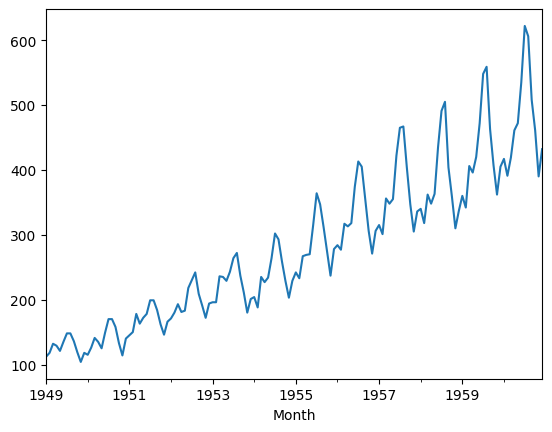

In [8]:
df['Thousands of Passengers'].plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(dataset):
    result = adfuller(dataset)
    print("ADF statistic: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    if result[1] < 0.05:
        print("Strong evidence against null hypothesis, rejected null hypothesis")
        print("stationary data")
    else:
        print("Week evidence against null hypothesis, accepted null hypothesis")
        print("non stationary")

In [10]:
adfuller_test(df['Thousands of Passengers'])

ADF statistic: 0.8153688792060482
p-value: 0.991880243437641
Week evidence against null hypothesis, accepted null hypothesis
non stationary


In [11]:
# we go through this technique untill our data is not stationary
df['passanger first differennce'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [12]:
adfuller_test(df['passanger first differennce'].dropna())

ADF statistic: -2.8292668241699994
p-value: 0.0542132902838255
Week evidence against null hypothesis, accepted null hypothesis
non stationary


In [13]:
df['passanger second differennce'] = df['passanger first differennce'] - df['passanger first differennce'].shift(1)

In [14]:
adfuller_test(df['passanger second differennce'].dropna())

ADF statistic: -16.384231542468505
p-value: 2.7328918500142407e-29
Strong evidence against null hypothesis, rejected null hypothesis
stationary data


In [15]:
df['passanger 12 differennce'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [16]:
adfuller_test(df['passanger 12 differennce'].dropna())

ADF statistic: -3.383020726492481
p-value: 0.011551493085514954
Strong evidence against null hypothesis, rejected null hypothesis
stationary data


In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### we have three params in ARIMA p,q,d

#### With the help of pacf we basically performming Moving Average(MA) which is q value

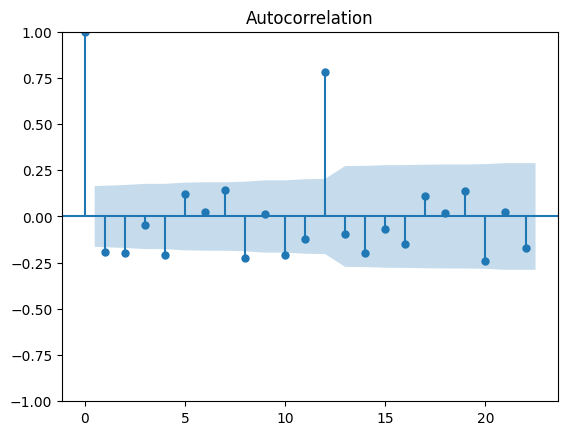

In [18]:
plot_acf = plot_acf(df['passanger second differennce'].dropna())

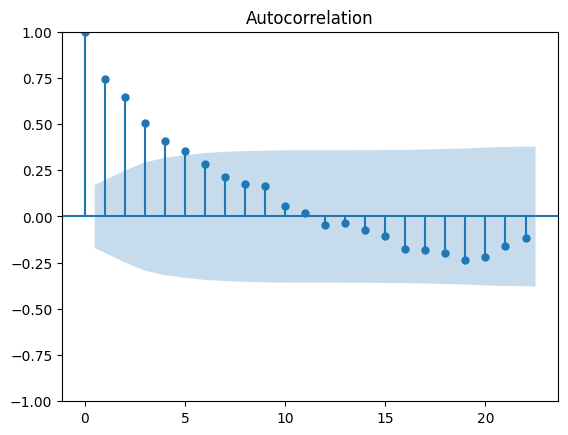

In [21]:
acf12 = plot_acf(df["passanger 12 differennce"].dropna())

#### With the help of pacf we basically performming auto regressive(AR) which is p value

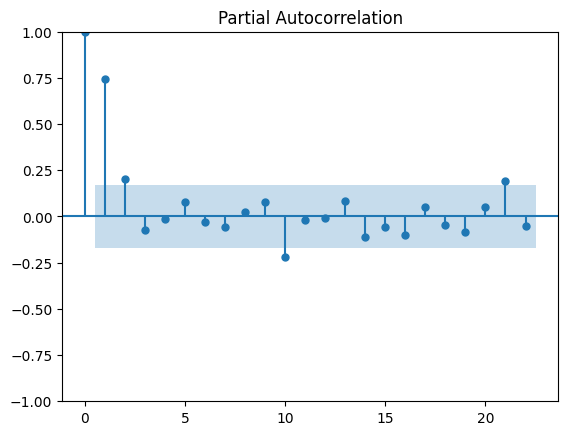

In [22]:
pacf12 = plot_pacf(df["passanger 12 differennce"].dropna())

In [23]:
df.head(2)

,Thousands of Passengers,passanger first differennce,passanger second differennce,passanger 12 differennce
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN


In [24]:
from datetime import datetime, timedelta

In [25]:
train_end = datetime(1955, 12, 1)
test_end = datetime(1960, 12, 1)

In [26]:
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]
print(train_data.shape)
print(test_data.shape)

(84, 4)
(60, 4)


In [27]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [157]:
#orders is p,d,q
model = ARIMA(train_data['Thousands of Passengers'], order=(6,2,3))
model = model.fit()

C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(6, 2, 3)   Log Likelihood                -355.116
Date:                     Sun, 07 May 2023   AIC                            730.232
Time:                             11:27:07   BIC                            754.299
Sample:                         01-01-1949   HQIC                           739.895
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2217      0.111    -10.966      0.000      -1.440      -1.003
ar.L2         -0.8104      0.172     -4.713      0.000      -1.147      -0.473
ar.L3         -0.3040      0.198     -1.535      0.125      -0.692       0.084
ar.L4         -0.6297      0.202     -3.124      0.002      -1.025      -0.235
ar.L5         -0.5719      0.207     -2.762      0.006      -0.978      -0.166
ar.L6         -0.4447      0.135     -3.291      0.001      -0.710      -0.180
ma.L1          0.5676     32.519      0.017      0.986     -63.168      64.304
ma.L2         -0.5881     50.968     -0.012      0.991    -100.484      99.308
ma.L3         -0.9793     31.854     -0.031      0.975     -63.411      61.453
sigma2       298.4450   9692.829      0.031      0.975   -1.87e+04    1.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.61   Prob(JB):                         0.29
Heteroskedasticity (H):               2.79   Skew:                             0.39
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [160]:
pred = model.predict(start = pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

In [161]:
test_data['predicted-ARIMA'] = pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2564\2500810041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted-ARIMA'] = pred


<Axes: xlabel='Month'>

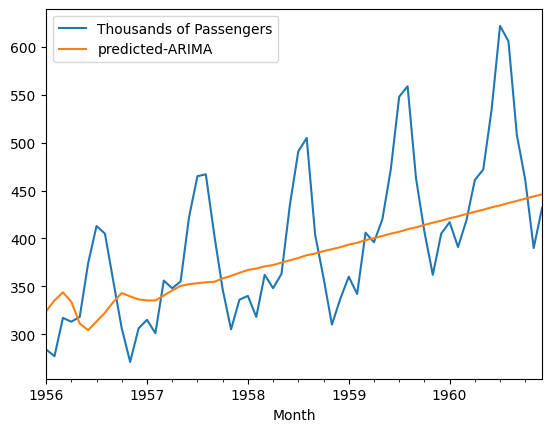

In [162]:
test_data[['Thousands of Passengers', 'predicted-ARIMA']].plot()

## Hence ARIMA not work well for seasonal data

### Let us try SARIMAX

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

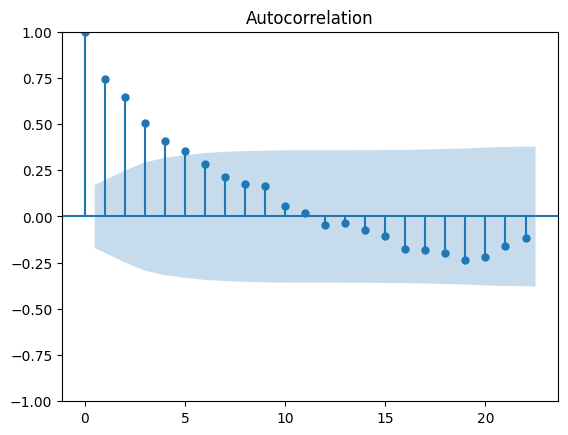

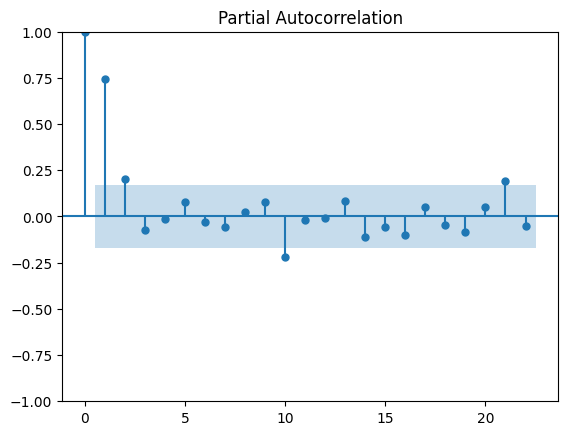

In [163]:
acf12 = plot_acf(df["passanger 12 differennce"].dropna())
pacf12 = plot_pacf(df["passanger 12 differennce"].dropna())

we have three values 'p', 'd', 'q'

from this order=(3,0,5) where 3 means plot_pacf out of bound labels

similarly 5 means plot_acf out of bound labels

In [164]:
model2 = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,6), seasonal_order=(0,2,1,12))
model2 = model2.fit()

C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [165]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 6)x(0, 2, [1], 12)   Log Likelihood                -229.867
Date:                              Sun, 07 May 2023   AIC                            481.733
Time:                                      11:27:19   BIC                            504.771
Sample:                                  01-01-1949   HQIC                           490.744
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8317      1.947      0.427      0.669      -2.985       4.648
ar.L2          0.2529      2.882      0.088      0.930      -5.395       5.901
ar.L3         -0.2601      1.249     -0.208      0.835      -2.707       2.187
ma.L1         -0.2694      1.958     -0.138      0.891      -4.108       3.569
ma.L2         -0.1411      1.828     -0.077      0.938      -3.723       3.441
ma.L3         -0.1294      0.696     -0.186      0.853      -1.494       1.235
ma.L4          0.2061      0.578      0.357      0.721      -0.926       1.338
ma.L5          0.2570      0.728      0.353      0.724      -1.171       1.685
ma.L6          0.1348      0.321      0.420      0.674      -0.494       0.763
ma.S.L12      -0.9557      2.433     -0.393      0.694      -5.725       3.813
sigma2        85.4177    189.577      0.451      0.652    -286.146     456.981
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.80   Prob(JB):                         0.46
Heteroskedasticity (H):               0.96   Skew:                             0.19
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [167]:
pred2 = model2.predict(start = pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2564\914467771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted-SARIMAX'] = pred2


<Axes: xlabel='Month'>

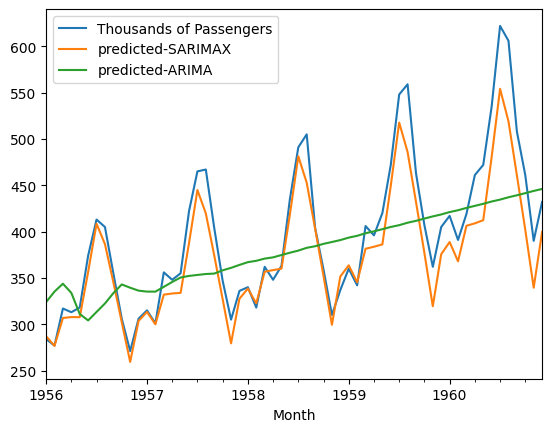

In [168]:
test_data['predicted-SARIMAX'] = pred2
test_data[['Thousands of Passengers', 'predicted-SARIMAX', 'predicted-ARIMA']].plot()

## Hence SARIMAX work far more better then ARIMAX